# White Wine Quality Dataset Analysis

This notebook focuses on analyzing the **White Wine Quality** dataset.

We will use the following tools and libraries:
- **`pandas`** for data manipulation and exploratory data analysis.
- **`matplotlib`** and **`seaborn`** for creating visualizations to understand the data better.
- **`scikit-learn`** for preprocessing, splitting the dataset into training and testing subsets, and building machine learning models.


### Step 0: Install Necessary Libraries

Before running the notebook, make sure you have all the required Python libraries installed:
- **ucimlrepo**: Fetches datasets from the UCI Machine Learning Repository.
- **pandas**: Handles data manipulation and analysis.
- **matplotlib** and **seaborn**: For creating visualizations.
- **scikit-learn**: Provides tools for splitting datasets and building machine learning models.

Run the following code to install them if they are not already installed.


In [193]:
# Install required libraries
# Install graphviz through graphviz.org, also add to path
%pip install ucimlrepo pandas matplotlib seaborn scikit-learn graphviz

Note: you may need to restart the kernel to use updated packages.


### Step 1: Import Libraries

We begin by importing the necessary libraries for data loading, manipulation, and visualization.

In [2]:
# Import libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Import libraries for machine learning and data splitting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Data Preprocessing

#### Dataset Metadata

We will load the `winequality.names` file to gain detailed information about the dataseg.


In [5]:
# Load and display the winequality.names file
names_file_path = "winequality.names"  # Update with your file path
with open(names_file_path, "r") as f:
    wine_names_content = f.read()

# Display the content
print(wine_names_content)


Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

Also, we will load the **White Wine Quality** dataset using `pandas` and perform a quick preview of the data to understand its structure.

In [7]:
# Load the White Wine Quality dataset
file_path = "winequality-white.csv"  # Update with your dataset path
data = pd.read_csv(file_path, sep=";")  # Dataset uses semicolon as the delimiter

# Display the first few rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Extract Features and Labels

After loading and previewing the dataset, we will extract:
- **Features**: The numerical columns describing tumor properties.
- **Labels**: The target column, which is `quality`.

In [9]:
# Extract features
features = data.drop(columns=['quality'])

# Group labels into 3 categories: Low, Standard, High
labels = data['quality'].apply(lambda x: 
    'Low Quality' if x <= 4 else 
    'Standard Quality' if x <= 6 else 
    'High Quality'
)


Preview the head of `features`:

In [15]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


Preview the head of `labels`:

In [18]:
labels.to_frame().head()

,quality
0,Standard Quality
1,Standard Quality
2,Standard Quality
3,Standard Quality
4,Standard Quality


## 2.1. Prepare the dataset for training

We will split the dataset into training and testing subsets with the following proportions:
- **40% Training / 60% Testing**
- **60% Training / 40% Testing**
- **80% Training / 20% Testing**
- **90% Training / 10% Testing**

In [21]:
# Define train-test proportions
train_sizes = [0.4, 0.6, 0.8, 0.9]

# Create a dictionary to store the splits
splits = {}

### Step 1: Perform Stratified Shuffle Split

Using the defined train-test proportions, we will:
1. Split the dataset into `feature_train`, `feature_test`, `label_train`, and `label_test` subsee2s.
3. Store the splits in a dictionary, where each key corresponds to the train-test proportion.


In [24]:
# Import StratifiedShuffleSplit to split the dataset into training and testing subsets
from sklearn.model_selection import StratifiedShuffleSplit


# Perform stratified shuffle split for each proportion
for train_size in train_sizes:
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, random_state=42)
    for train_index, test_index in sss.split(features, labels):
        feature_train = features.iloc[train_index]
        feature_test = features.iloc[test_index]
        label_train = labels.iloc[train_index]
        label_test = labels.iloc[test_index]
    
    # Store the splits in the dictionary
    splits[f'{int(train_size * 100)}/{int(round((1 - train_size) * 100))}'] = {
        'feature_train': feature_train,
        'feature_test': feature_test,
        'label_train': label_train,
        'label_test': label_test
    }


### Step 2: Confirm Splits

We will now verify that the splits were created correctly by:
1. Checking the structure of the dictionary where splits are stored.
2. Displaying a few rows from all the splits to confirm that the data is organized as expected.

In [27]:
# Display the keys of the splits dictionary 
splits.keys()

dict_keys(['40/60', '60/40', '80/20', '90/10'])

## 2.2. Build the decision tree classifiers

We will now train **Decision Tree Classifier** on **training data**.

### Parameters:
- **criterion='entropy'**: The splitting criterion is information gain (entropy).
- **random_state=42**: Ensures reproducibility of the training process.

This classifier will learn to differentiate between malignant and benign tumors based on the training data.

---

### Step 1: Training

Initializes a dictionary to store classifiers and a list to store the shapes of the training and testing datasets for each proportion. The loop iterates through all splits to extract the details for `feature_train`, `feature_test`, `label_train`, and `label_test`. The resulting details are stored in a structured table for better visualization.


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a dictionary to store classifiers
classifiers = {}

# Initialize a list to store the shapes 
dataset_shapes = []

# Train Decision Tree Classifier for each proportion
for proportion, data in splits.items():
    
    # Extract data
    feature_train = data['feature_train']
    feature_test = data['feature_test']
    label_train = data['label_train']
    label_test = data['label_test']
    
    # Initialize the Decision Tree Classifier
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
    
    # Train the classifier
    clf.fit(feature_train, label_train)
    
    # Store the classifier and split details
    classifiers[proportion] = {
        'classifier': clf,
        'feature_train': feature_train,
        'feature_test': feature_test,
        'label_train': label_train,
        'label_test': label_test
    }
    # Append details to the list
    dataset_shapes.append({
        'Proportion': proportion,
        'Feature Train Shape': feature_train.shape,
        'Feature Test Shape': feature_test.shape,
        'Label Train Shape': label_train.shape,
        'Label Test Shape': label_test.shape
    })


shapes_df = pd.DataFrame(dataset_shapes)

# Display the DataFrame
shapes_df


,Proportion,Feature Train Shape,Feature Test Shape,Label Train Shape,Label Test Shape
0,40/60,"(1959, 11)","(2939, 11)","(1959,)","(2939,)"
1,60/40,"(2938, 11)","(1960, 11)","(2938,)","(1960,)"
2,80/20,"(3918, 11)","(980, 11)","(3918,)","(980,)"
3,90/10,"(4408, 11)","(490, 11)","(4408,)","(490,)"


### Step 2: Export the Decision Tree to Graphviz Format
We export the trained decisions tree to Graphviz's DOT format, which allows us to visualize the tree structure.


In [33]:
from sklearn.tree import export_graphviz

# Initialize a dictionary to store DOT data for each proportion
dot_files = {}

# Loop through all trained classifiers to export decision trees
for proportion, data in classifiers.items():
    # Extract the classifier and its training data
    clf = data['classifier']
    feature_train = data['feature_train']
    
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        clf,
        out_file=None,  # Do not write to a file
        feature_names=feature_train.columns,  # Feature names
        class_names=['Low Quality', 'Standard Quality', 'High Quality'],  # Adjust as needed
        filled=True,  # Fill nodes with colors
        rounded=True,  # Use rounded edges
        special_characters=True,  # Allow special characters
        max_depth=5  # Adjust the depth of the tree for visualization
    )
    
    # Store the DOT data
    dot_files[proportion] = dot_data


### Step 3: Visualize the Decision Tree Using Graphviz

The DOT data is converted to an image using Graphviz. This visualization provides a graphical representation of the decision tree:
- Splits based on feature thresholds.
- The reduction in entropy at each split.
- Predicted class and sample counts at leaf nodes.

---

**Decision Tree of 40/60:**

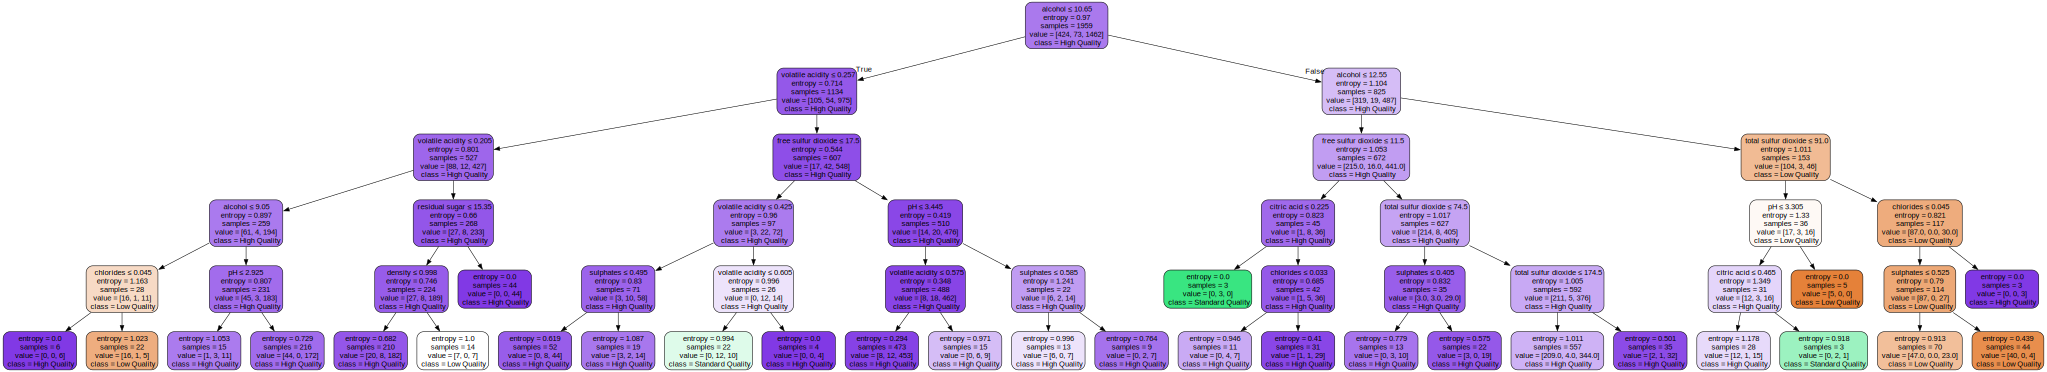

In [99]:
from graphviz import Source

# Render and display using Graphviz
graph = Source(dot_files["40/60"])
graph.render("decision_tree_40_60", format="png", cleanup=True)
graph

**Decision Tree of 60/40:**

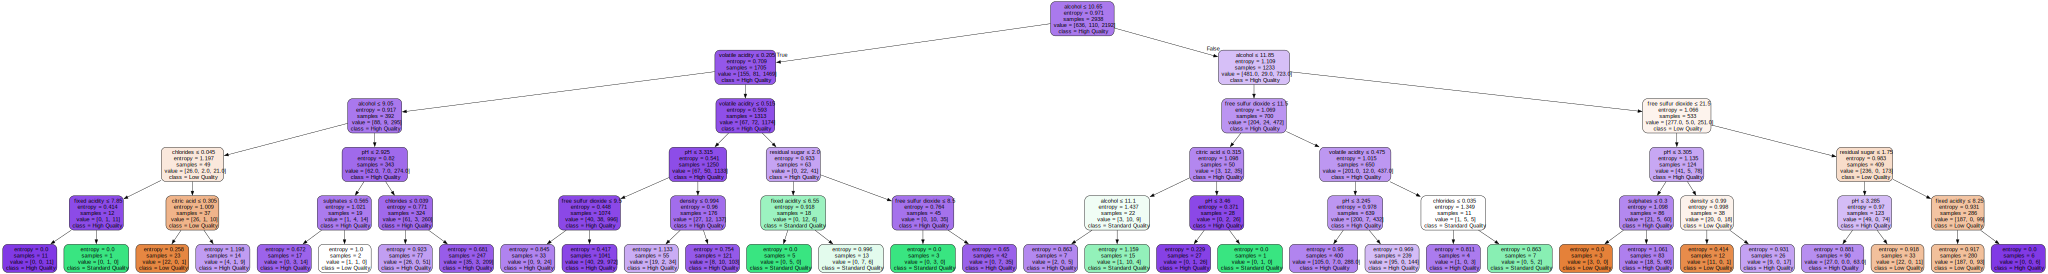

In [101]:
# Render and display using Graphviz
graph = Source(dot_files["60/40"])
graph.render("decision_tree_60_40", format="png", cleanup=True)
graph

**Decision Tree of 80/20:**

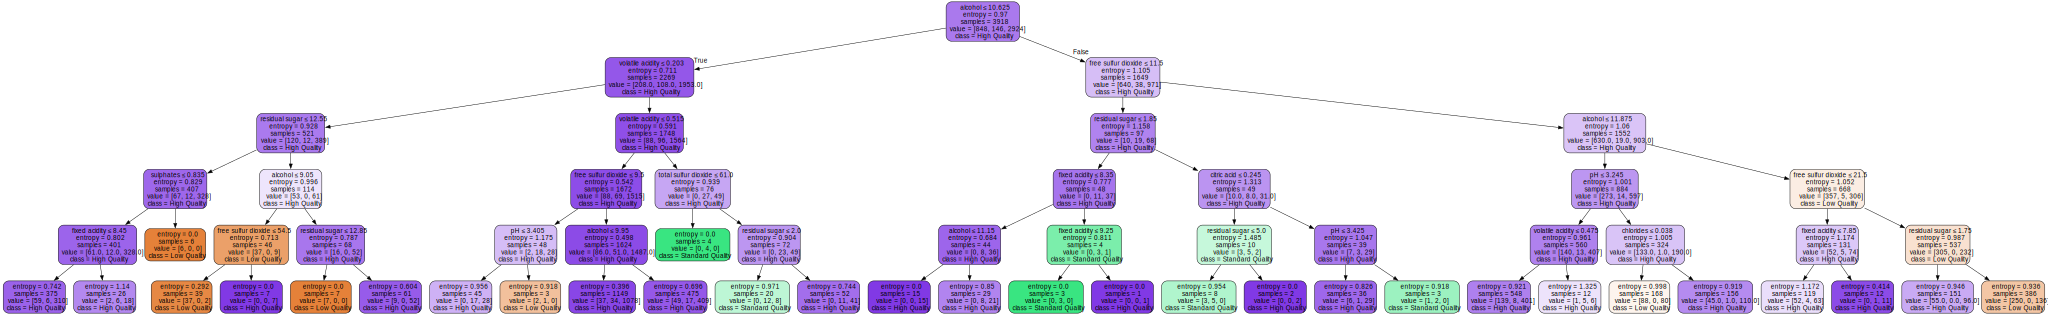

In [103]:
# Render and display using Graphviz
graph = Source(dot_files["80/20"])
graph.render("decision_tree_80_20", format="png", cleanup=True)
graph

**Decision Tree of 90/10:**

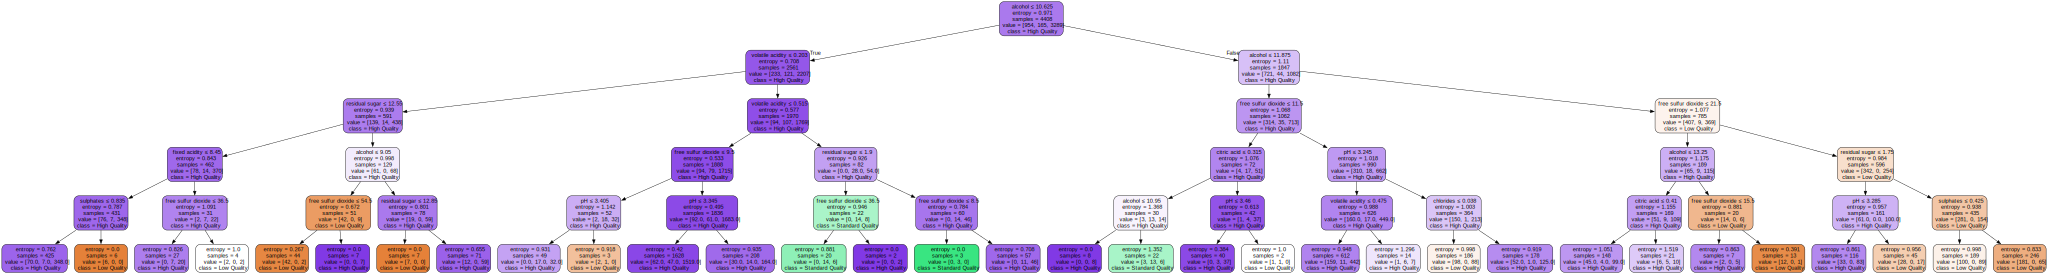

In [105]:
# Render and display using Graphviz
graph = Source(dot_files["90/10"])
graph.render("decision_tree_90_10", format="png", cleanup=True)
graph

## 2.3: Evaluating the Decision Tree Classifier

After training the Decision Tree Classifier, we evaluate its performance on the test set for the **White Wine Quality** dataset. This involves the following tasks:

### **Tasks:**
1. **Make Predictions**:
   - Use the trained Decision Tree model to predict wine quality categories for the testing dataset.
2. **Compute Metrics**:
   - **Accuracy Score**: Measures the overall performance of the classifier by calculating the proportion of correctly predicted samples out of the total.
   - **Confusion Matrix**: Provides a detailed breakdown of True Positives, True Negatives, False Positives, and False Negatives for each quality category (Low Quality, Standard Quality, and High Quality).
   - **Classification Report**: Includes precision, recall, and F1-score for each wine quality category, providing insights into the performance for each class.

The results are visualized using heatmaps for the confusion matrix and tabular displays for the classification report, offering a clear interpretation of the classifier's performance.


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.display import display, Markdown

def evaluate_proportion(proportion):
    if proportion not in classifiers:
        display(Markdown(f"**Proportion '{proportion}' not found!**"))
        return
    
    # Extract the trained classifier and test data
    data = classifiers[proportion]
    clf = data['classifier']
    feature_test = data['feature_test']
    label_test = data['label_test']
    
    # Make predictions
    predictions = clf.predict(feature_test)
    
    # Compute confusion matrix and classification report
    conf_matrix = confusion_matrix(label_test, predictions)
    class_report = classification_report(
        label_test, predictions, target_names=['Low Quality', 'Standard Quality', 'High Quality'], output_dict=True
    )
    
    # Display markdown heading
    display(Markdown(f"### Report for the {proportion} Proportion Dataset"))
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(
        conf_matrix, annot=True, fmt='d', cmap="Blues", 
        xticklabels=['Low Quality', 'Standard Quality', 'High Quality'], 
        yticklabels=['Low Quality', 'Standard Quality', 'High Quality']
    )
    plt.title(f"Confusion Matrix for {proportion} Dataset")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Display classification report as a table
    display(Markdown("#### Classification Report:"))
    class_report_df = pd.DataFrame(class_report).transpose()
    display(class_report_df)


**Report of Different Proportion Decision Tree Classifiers**

### Report for the 60/40 Proportion Dataset

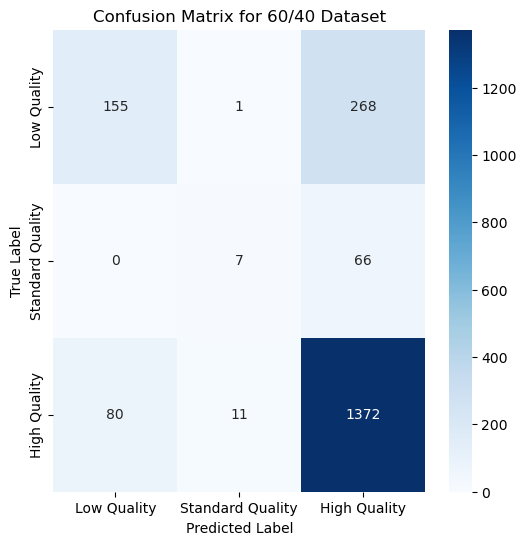

#### Classification Report:

,precision,recall,f1-score,support
Low Quality,0.659574,0.365566,0.470410,424.000000
Standard Quality,0.368421,0.095890,0.152174,73.000000
High Quality,0.804220,0.937799,0.865888,1463.000000
accuracy,0.782653,0.782653,0.782653,0.782653
macro avg,0.610739,0.466418,0.496157,1960.000000
weighted avg,0.756698,0.782653,0.753754,1960.000000


In [51]:
evaluate_proportion("60/40")

### Insights for the 60/40 Proportion Dataset

- The classifier achieves excellent recall for high-quality wines (93.77%), indicating that most high-quality wines are correctly identified.
- Precision for low-quality wines (65.96%) suggests moderate reliability in identifying low-quality wines, but with room for improvement.
- Standard-quality wines have poor recall (9.59%), indicating significant difficulty in correctly identifying this category, often misclassifying it as either low or high quality.
- The overall accuracy is 78.27%, reflecting a satisfactory performance for distinguishing between low and high-quality wines but struggles with the standard-quality category.


### Report for the 40/60 Proportion Dataset

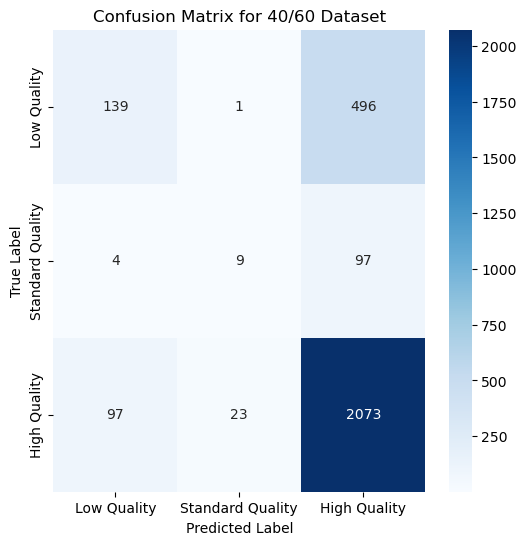

#### Classification Report:

,precision,recall,f1-score,support
Low Quality,0.579167,0.218553,0.317352,636.000000
Standard Quality,0.272727,0.081818,0.125874,110.000000
High Quality,0.777569,0.945280,0.853262,2193.000000
accuracy,0.755699,0.755699,0.755699,0.755699
macro avg,0.543154,0.415217,0.432163,2939.000000
weighted avg,0.715740,0.755699,0.710066,2939.000000


In [54]:
evaluate_proportion("40/60")

### Insights for the 40/60 Proportion Dataset

- High-quality wines demonstrate strong recall (94.53%), ensuring most high-quality wines are correctly identified, contributing significantly to the overall accuracy.
- Low-quality wines show weak recall (21.85%), indicating difficulty in correctly identifying low-quality samples, with many being misclassified.
- Standard-quality wines have very poor precision (27.27%) and recall (8.18%), highlighting significant challenges in predicting this class.
- The overall accuracy is 75.57%, driven mainly by the strong performance on high-quality wines, while low and standard-quality categories need considerable improvement.


### Report for the 80/20 Proportion Dataset

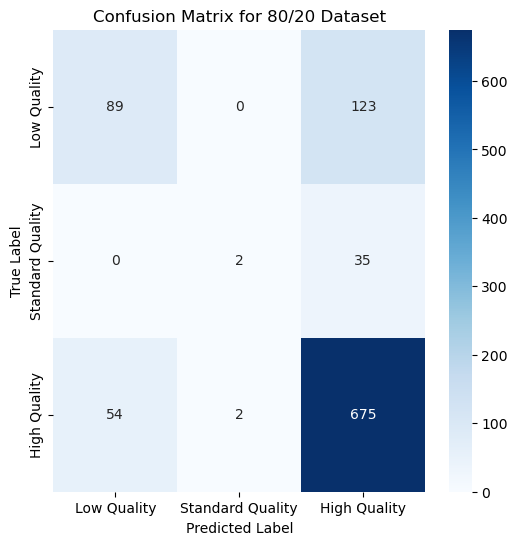

#### Classification Report:

,precision,recall,f1-score,support
Low Quality,0.622378,0.419811,0.501408,212.000000
Standard Quality,0.500000,0.054054,0.097561,37.000000
High Quality,0.810324,0.923393,0.863171,731.000000
accuracy,0.781633,0.781633,0.781633,0.781633
macro avg,0.644234,0.465753,0.487380,980.000000
weighted avg,0.757950,0.781633,0.756007,980.000000


In [57]:
evaluate_proportion("80/20")

### Insights for the 80/20 Proportion Dataset

- High-quality wines exhibit excellent recall (92.34%), ensuring most high-quality wines are accurately identified.
- Low-quality wines display moderate recall (41.98%) and precision (62.24%), indicating room for improvement in correctly classifying this category.
- Standard-quality wines face significant challenges, with very low recall (5.41%) and F1-score (9.76%), suggesting difficulty in identifying this class.
- The overall accuracy is 78.16%, primarily driven by the strong performance on high-quality wines, while low and standard-quality classifications remain areas for improvement.


### Report for the 90/10 Proportion Dataset

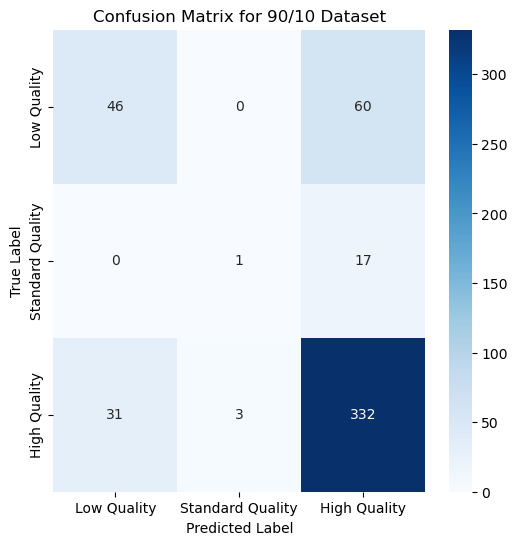

#### Classification Report:

,precision,recall,f1-score,support
Low Quality,0.597403,0.433962,0.502732,106.000000
Standard Quality,0.250000,0.055556,0.090909,18.000000
High Quality,0.811736,0.907104,0.856774,366.000000
accuracy,0.773469,0.773469,0.773469,0.773469
macro avg,0.553046,0.465541,0.483472,490.000000
weighted avg,0.744735,0.773469,0.752052,490.000000


In [60]:
evaluate_proportion("90/10")

### Insights for the 90/10 Proportion Dataset

- High-quality wines maintain excellent recall (90.71%) and strong precision (81.17%), ensuring the majority of high-quality wines are accurately classified.
- Low-quality wines show moderate recall (43.40%) and precision (59.74%), indicating potential misclassifications with other classes.
- Standard-quality wines continue to struggle, with very low recall (5.56%) and F1-score (9.09%), reflecting difficulty in identifying this class.
- Overall accuracy is 77.35%, driven largely by the strong classification of high-quality wines, but the low and standard-quality categories remain challenging to classify effectively.


### Final Insights Across All Proportions

- **High-Quality Wine Detection**: High-quality wines consistently achieve strong precision and recall across all splits, with the best performance in the **60/40** and **80/20** proportions.
- **Low-Quality Wine Classification**: Low-quality wines show moderate performance, with recall varying significantly across splits. The **80/20** split achieves a better balance for this category.
- **Standard-Quality Challenges**: Standard-quality wines remain the most challenging to classify, with consistently low recall and F1-scores across all proportions.
- **Overall Accuracy**: The **80/20** proportion provides the best balance of performance metrics, achieving an overall accuracy of 78.16%.
- **Split Size Impact**: Larger training sets (e.g., **60/40** and **80/20**) yield more reliable classification results, particularly for high-quality wines, while smaller training sets (e.g., **40/60**) see reduced precision and recall for low and standard-quality categories.


## 2.4. The Depth and Accuracy of a Decision Tree

This task examines how the depth of a decision tree affects its classification accuracy using the **80/20 split**. We will:
1. Train the decision tree classifier for different values of `max_depth`: `[None, 2, 3, 4, 5, 6, 7]`.
2. Visualize the decision trees for each depth using Graphviz.
3. Compute the **accuracy score** on the test set for each depth.
4. Provide charts  on the statistics

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define depths
depths = [1, 2, 3, 4, 5, 6, 7]

# Extract the 80/20 proportion dataset
feature_train = splits['80/20']['feature_train']
feature_test = splits['80/20']['feature_test']
label_train = splits['80/20']['label_train']
label_test = splits['80/20']['label_test']

# Store accuracy results
accuracy_results = []

# Evaluate the model for each depth
for depth in depths:
    # Train decision tree
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    clf.fit(feature_train, label_train)
    
    # Predict and evaluate accuracy
    predictions = clf.predict(feature_test)
    accuracy = accuracy_score(label_test, predictions)
    accuracy_results.append({'max_depth': depth, 'accuracy': accuracy})


### Decision Trees Visualizations for different `max_depth`
Below are visualizations of the Decision Tree classifier for selected values of `max_depth`. Each visualization highlights how the tree's complexity evolves with increasing depth.

---

Tree with max_depth=1:

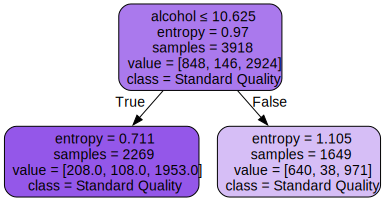

In [72]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=1)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_1 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=1
)

# Render and display 
graph = Source(depth_1)
graph.render("max_depth_1_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=2:

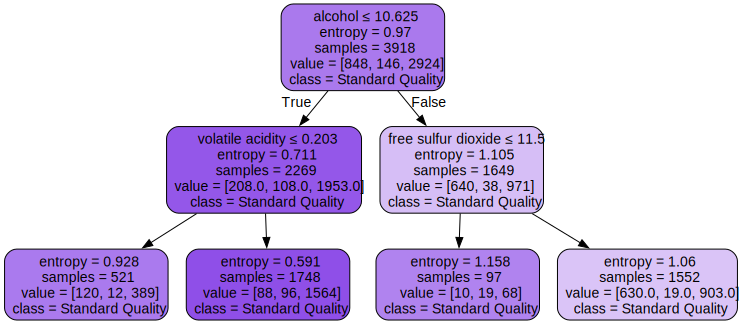

In [75]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=2)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_2 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=2
)

# Render and display 
graph = Source(depth_2)
graph.render("max_depth_2_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=3:

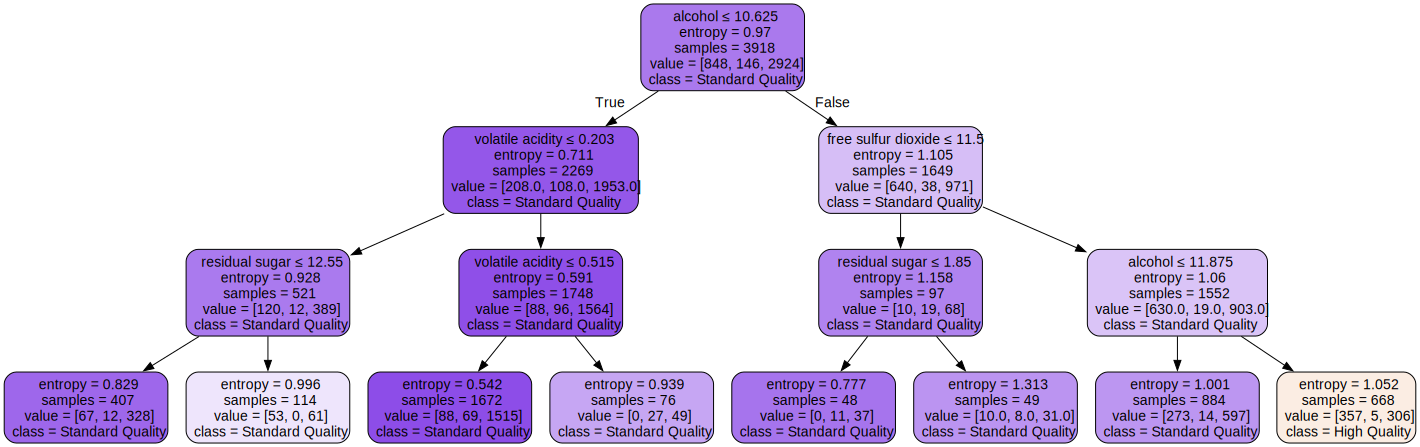

In [77]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=3)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_3 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3
)

# Render and display 
graph = Source(depth_3)
graph.render("max_depth_3_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=4:

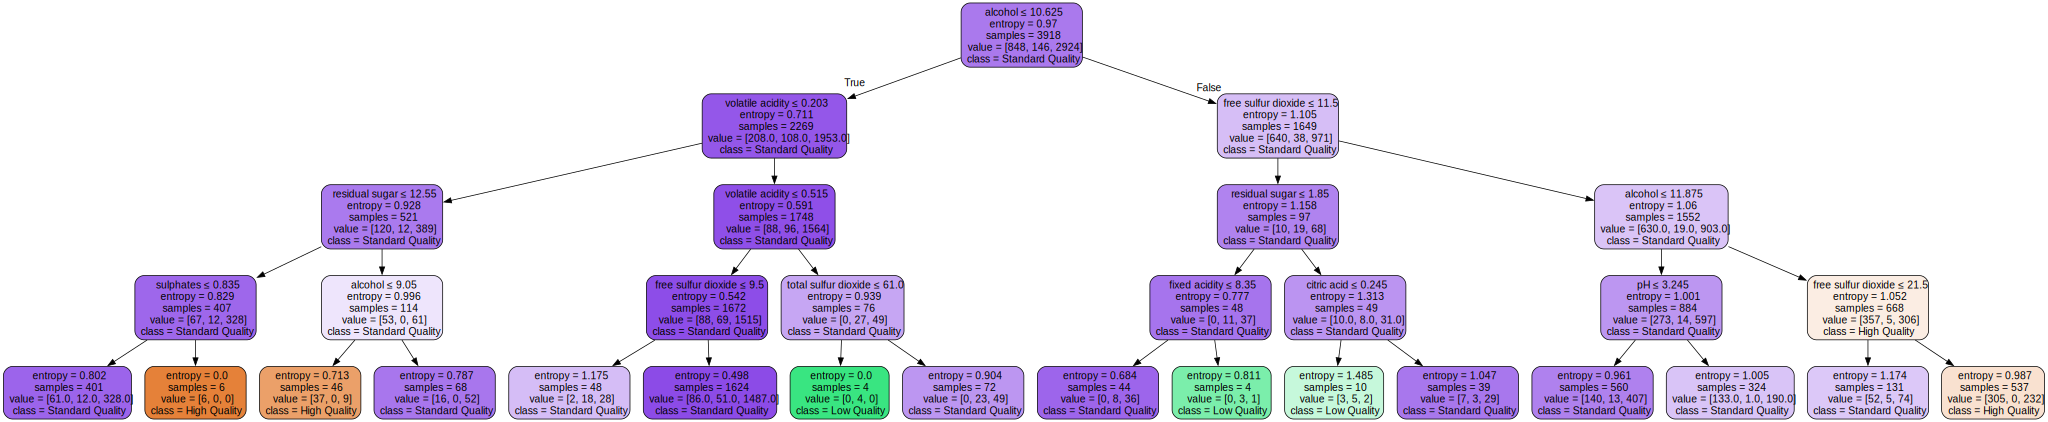

In [80]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=4)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_4 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=4
)

# Render and display 
graph = Source(depth_4)
graph.render("max_depth_4_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=5:

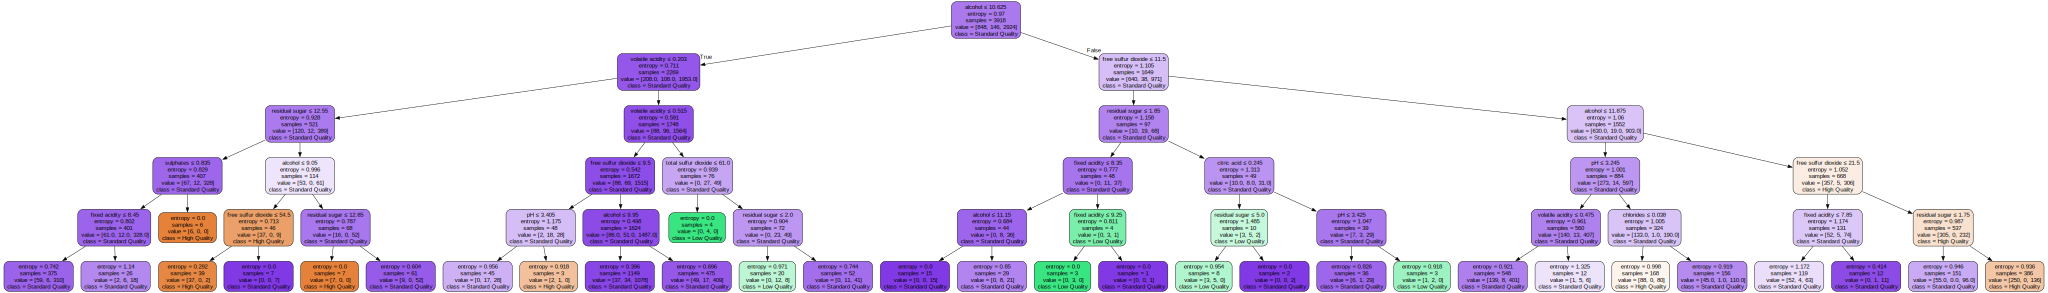

In [82]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=5)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_5 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=5
)

# Render and display 
graph = Source(depth_5)
graph.render("max_depth_5_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=6:

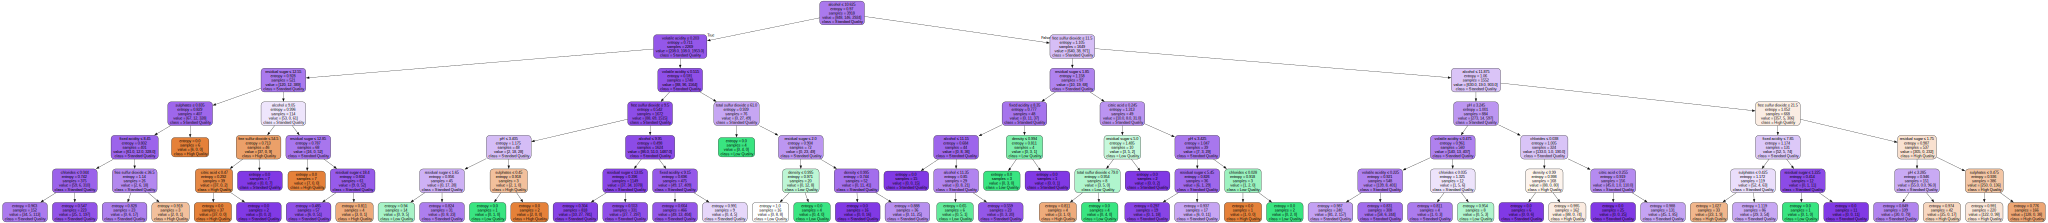

In [84]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=6)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_6 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=6
)

# Render and display 
graph = Source(depth_6)
graph.render("max_depth_6_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=7:

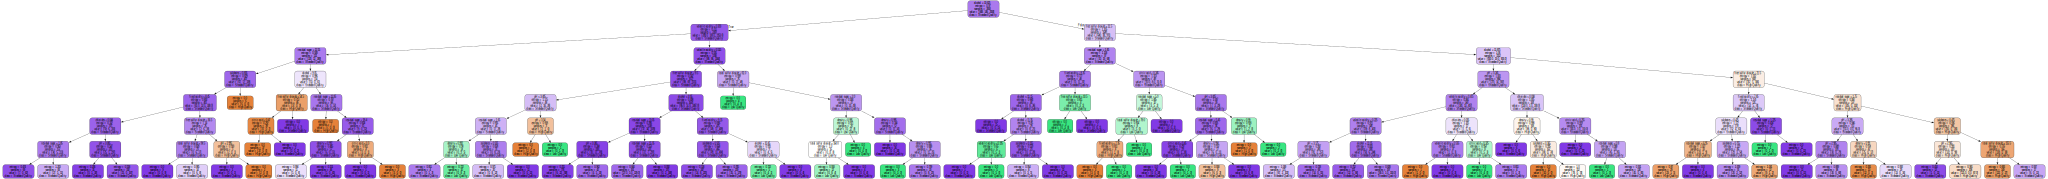

In [87]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=7)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_7 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=7
)

# Render and display 
graph = Source(depth_7)
graph.render("max_depth_7_decision_tree", format="png", cleanup=True)
graph

### Accuracy of Decision Tree Classifier for Different `max_depth`

The table below shows the test set accuracy for the Decision Tree Classifier with varying values of `max_depth`. This highlights how the depth of the tree affects its performance.

In [90]:
# Convert accuracy results to DataFrame and set max_depth as index
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df.set_index('max_depth', inplace=True)

# Display the DataFrame
accuracy_df


,accuracy
max_depth,
1,0.745918
2,0.745918
3,0.761224
4,0.772449
5,0.781633
6,0.786735
7,0.787755


### Accuracy vs. max_depth Chart

Below is a chart showing how the accuracy of the Decision Tree Classifier changes with different values of `max_depth`. This visualization helps identify the optimal depth for the model.

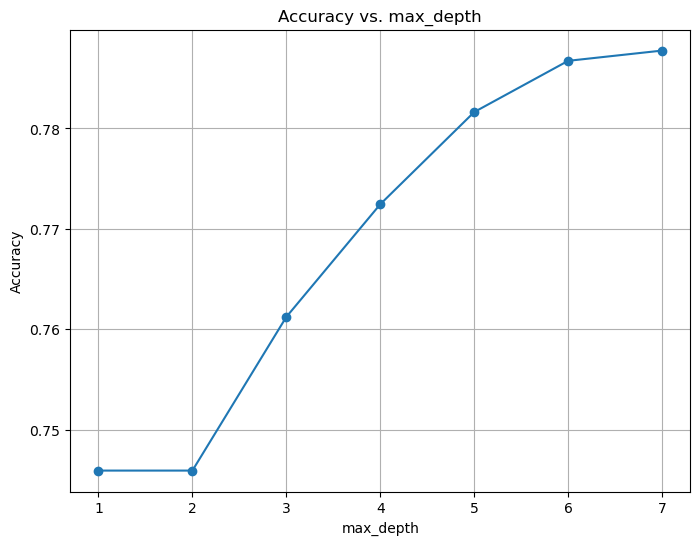

In [93]:
import matplotlib.pyplot as plt

# Plot accuracy vs. max_depth
plt.figure(figsize=(8, 6))
plt.plot(accuracy_df.index, accuracy_df['accuracy'], marker='o', linestyle='-')

# Add labels and title
plt.title("Accuracy vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(accuracy_df.index)
plt.grid(True)
plt.show()


## Insights from Accuracy vs. max_depth Chart

### Observations:
- **Shallow Depths (`max_depth=1` to `max_depth=2`)**:
  - Accuracy starts relatively low at shallow depths, indicating underfitting as the model fails to capture essential patterns.
  - A sharp improvement in accuracy is observed when moving to `max_depth=2`, suggesting the model begins to adapt better to the data.

- **Intermediate Depths (`max_depth=3` to `max_depth=4`)**:
  - Accuracy reaches a high point, stabilizing at an optimal range, indicating that these depths strike a balance between underfitting and overfitting.

- **Deeper Depths (`max_depth=5` to `max_depth=7`)**:
  - While accuracy fluctuates, additional complexity from increased depth may result in overfitting to noise in the training data.

### Insights:
- **Optimal Depth**: The model achieves its best performance at intermediate depths (`max_depth=3` or `4`), where it generalizes well without overfitting.
- **Deeper Models**: Although deeper models perform adequately, they exhibit signs of overfitting, evidenced by fluctuating accuracy at higher depths.

---

## Insights for the Whole Work

### Overall Performance:
- The decision tree classifier demonstrates strong overall performance, achieving high accuracy across all training-test splits.
- The stratified splitting approach ensures consistent class distribution, improving model reliability.

### Strengths:
- **High Classification Accuracy**: Intermediate tree depths (`max_depth=3` or `4`) provide optimal performance, achieving a balance between accuracy and generalization.
- **Effective Visualization**: The use of confusion matrices, classification reports, and decision tree diagrams enabled detailed evaluation and interpretation.

### Weaknesses:
- **Low Recall for Standard Quality**: Standard Quality wines are consistently under-classified, as seen from low recall and F1-scores.
- **Potential Overfitting at Deeper Depths**: Deeper trees (`max_depth=5` or more) exhibit fluctuating accuracy, indicating overfitting to training data.

### Process Analysis:
- **Data Preparation**:
  - Grouping wine quality into broader categories (Low, Standard, High) simplified the problem and improved interpretability.
  - Missing values were checked and handled effectively (no missing values in this case).
- **Model Evaluation**:
  - Comprehensive evaluation metrics like accuracy, recall, precision, and F1-scores provided valuable insights into model performance.
  - Hyperparameter tuning (varying `max_depth`) revealed the relationship between tree complexity and classification performance.

### Conclusion:
This analysis highlights the effectiveness of decision trees in classifying wine quality. Intermediate tree depths consistently deliver strong results, but further improvements are needed in detecting Standard Quality wines. Overall, the process demonstrates robust methodology and insightful evaluation for practical use cases.
